Dataset shape: (36598, 15)
   age  workclass  fnlwgt     education  education-num      marital-status  \
0   25    Private  226802          11th              7       Never-married   
1   38    Private   89814       HS-grad              9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm             12  Married-civ-spouse   
3   44    Private  160323  Some-college             10  Married-civ-spouse   
4   18        NaN  103497  Some-college             10       Never-married   

          occupation relationship   race     sex  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male             0             0   
1    Farming-fishing      Husband  White    Male             0             0   
2    Protective-serv      Husband  White    Male             0             0   
3  Machine-op-inspct      Husband  Black    Male          7688             0   
4                NaN    Own-child  White  Female             0             0   

   hours-per-week nativ

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


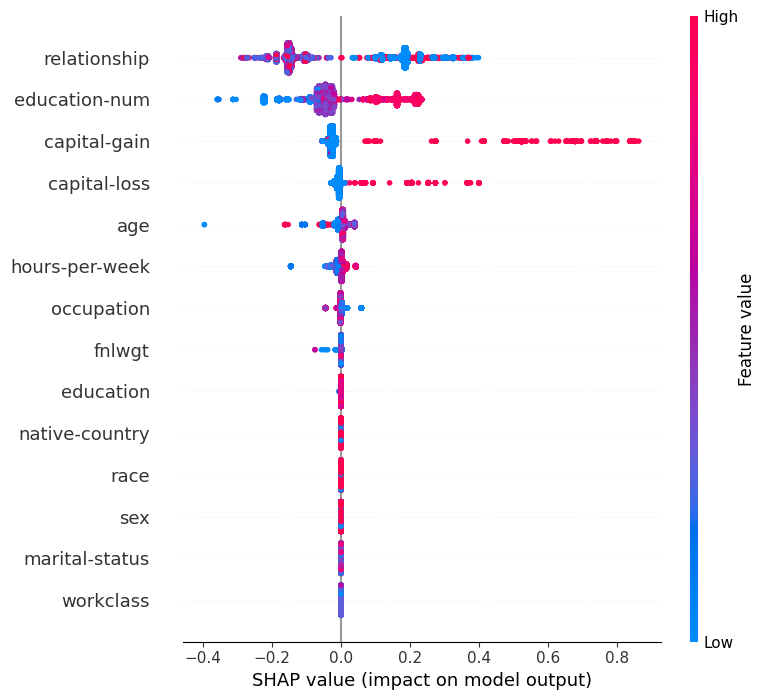

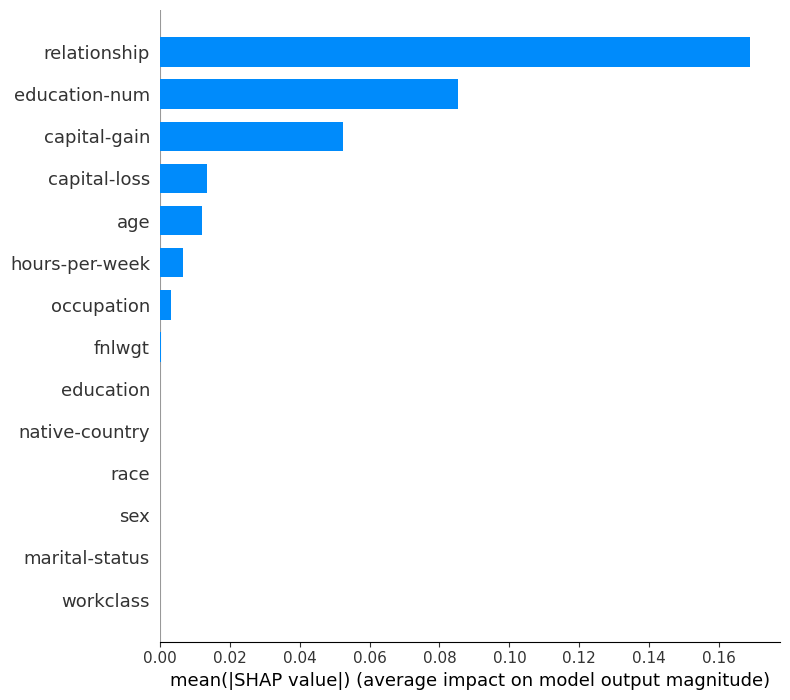

In [ ]:

# -- Step 1: Import Libraries ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

import shap
shap.initjs()

# --- Step 2: Load Dataset ---
df = pd.read_csv(r"UCI_Adult_Income.csv")
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
print("Dataset shape:", df.shape)
print(df.head())

# --- Step 3: Clean Data ---
# Strip column name whitespace
df.columns = df.columns.str.strip()
# Strip whitespace inside string columns
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].str.strip()
# Drop rows that contain '?' (missing values)
df = df[(df != '?').all(axis=1)]
print("After cleaning:", df.shape)

# --- Step 4: Encode categorical columns ---
categorical_cols = df.select_dtypes(include=['object']).columns
le = LabelEncoder()

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

df.head()

# --- Step 5: Split into train/test with sensitive variables ---
X = df.drop('class', axis=1)
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# --- Step 6: Train Model with sensitive variables---
model = DecisionTreeClassifier(max_depth=5, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# --- Step 7: SHAP Explainability ---
explainer = shap.TreeExplainer(model)
# SHAP returns 3D array: (samples, features, classes)
shap_values = explainer.shap_values(X_test)
# We need SHAP values for Class 1 (">50K")
shap_values_class_1 = shap_values[:, :, 1]
print("Original 3D SHAP array shape:", shap_values.shape)
print("Sliced 2D SHAP array shape:", shap_values_class_1.shape)
print("X_test shape:", X_test.shape)
# Beeswarm Plot
print("Displaying SHAP Beeswarm Plot for Class 1...")
shap.summary_plot(shap_values_class_1, X_test)
# Bar Plot
shap.summary_plot(shap_values_class_1, X_test, plot_type="bar")

